In [1]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from noiseestimator import NoiseEstimator

In [2]:
data = pd.read_excel('../data/external/rxn_Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx')
data

,Ligand,Additive,Base,Aryl halide,Output
0,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,CC1=CC(C)=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,ClC1=NC=CC=C1,70.410458
1,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,O=C(OC)C1=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,BrC1=NC=CC=C1,11.064457
2,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)...,O=C(OC)C1=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,IC1=CC=C(CC)C=C1,10.223550
3,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CCOC(C1=CON=C1)=O,CN1CCCN2C1=NCCC2,ClC1=CC=C(C(F)(F)F)C=C1,20.083383
4,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,CC1=CC(C)=NO1,CN1CCCN2C1=NCCC2,ClC1=CC=C(OC)C=C1,0.492663
...,...,...,...,...,...
3950,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C3CCCCC3)...,C1(C2=CC=CC=C2)=CON=C1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,BrC1=CC=C(OC)C=C1,4.344677
3951,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CC1=CC(N2C=CC=C2)=NO1,CN1CCCN2C1=NCCC2,BrC1=CC=C(OC)C=C1,47.156275
3952,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P(C(C)(C)C)...,CCOC(C1=CON=C1)=O,CC(C)(C)/N=C(N(C)C)/N(C)C,ClC1=CC=C(C(F)(F)F)C=C1,0.701552
3953,CC(C)C(C=C(C(C)C)C=C1C(C)C)=C1C2=C(P([C@@]3(C[...,C1(N(CC2=CC=CC=C2)CC3=CC=CC=C3)=CC=NO1,CN(C)P(N(C)C)(N(C)C)=NP(N(C)C)(N(C)C)=NCC,ClC1=CC=C(C(F)(F)F)C=C1,15.561565


In [3]:
data.Output.to_csv('../data/processed/buchwald.csv', index=False)

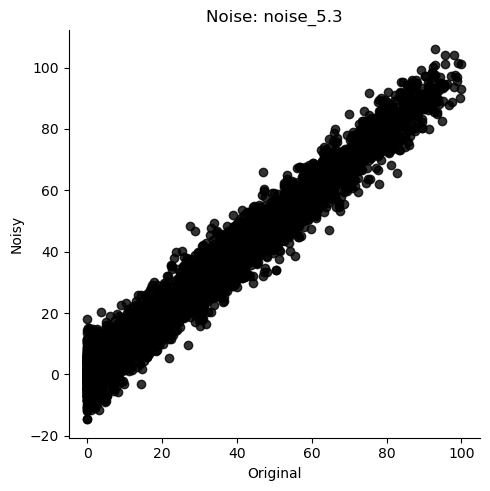

In [4]:
NE = NoiseEstimator(data.Output, 5.3)
NE.plot()

<Axes: title={'center': 'r2 for different noise levels'}, xlabel='Noise level', ylabel='r2'>

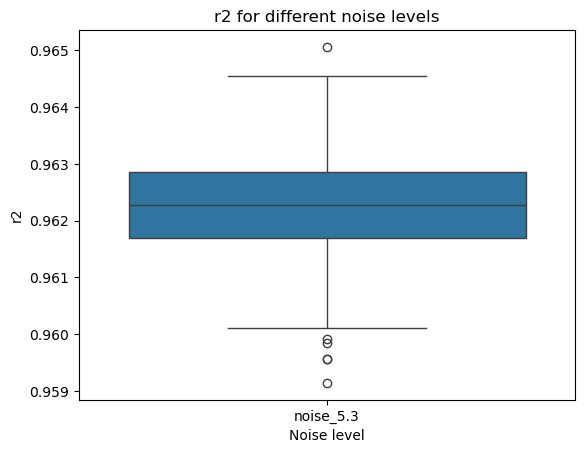

In [5]:
NE.plot_bootstrap(metric='r2')

In [6]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_5.3,4.227646,28.089567,5.299612,0.962277,0.981671


<Axes: title={'center': 'r2 for different noise levels'}, xlabel='Noise level', ylabel='r2'>

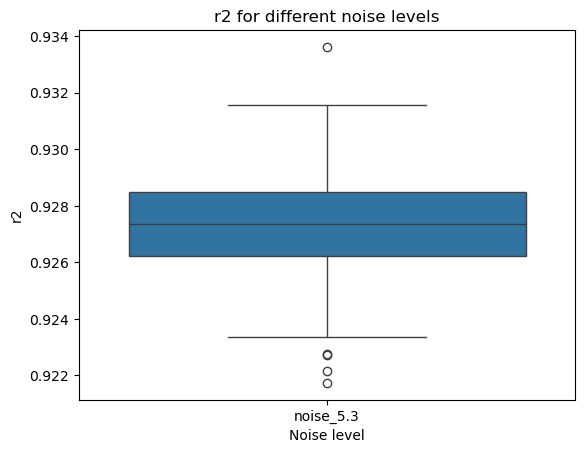

In [7]:
NE = NoiseEstimator(data.Output, 5.3, 5.3)
NE.plot_bootstrap(metric='r2')

In [8]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_5.3,5.976581,56.111087,7.490271,0.927361,0.9637


In [9]:
NE.noise_bootstraps.r2.to_csv('../data/interim/rxn_Buchwald_r2.csv', index=False)